In [76]:
#import the required libraries
import pandas as pd
import numpy as np
import os
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sn
import inflect
converter = inflect.engine()

### read the financial statements

In [77]:
# read the xl file
xml_file = "bilancio_test.xml"

with open(xml_file, "r", encoding="utf8") as f:
    contents = f.read()
    soup = BeautifulSoup(contents, "xml")


In [79]:
tags=[tag.name for tag in soup.find_all()] # read data from all tags except the generic ones
tags.remove('html')
tags.remove('body')
tags.remove('xbrl')
tags=list(set(tags))
tags

['datianagraficinumerorea',
 'amministratoricrediti',
 'patrimonionettoriservasoprapprezzoazioni',
 'amministratorianticipazioni',
 'alienazionieserciziovalorenominaleazioniproprie',
 'valoreproduzionealtriricaviproventicontributicontoesercizio',
 'acquisizioniesercizionumeroazioniquotesocietacontrollanti',
 'alienazionieserciziocorrispettivoazioniproprie',
 'introduzioneinformazionicalceallostatopatrimonialemicro',
 'costiproduzionematerieprimesussidiarieconsumomerci',
 'totalecrediti',
 'impegniimporto',
 'costiproduzioneoneridiversigestione',
 'amministratoriimpegniassuntilorocontoeffettogaranzieprestate',
 'commentobilanciomicroaltreinformazioni',
 'sindacianticipazioni',
 'azioniproprievalorenominale',
 'acquisizionieserciziovalorenominaleazioniproprie',
 'datianagraficicodicecciaa',
 'risultatoprimaimposte',
 'alienazionieserciziopartecapitalecorrispondenteazioniquotesocietacontrollanti',
 'azioniquotesocietacontrollantinumero',
 'utileperditaesercizio',
 'totalepassivo',
 'datia

In [80]:
long_tags=[t for t in tags if len(t)>10] # long tags list
long_tags

['datianagraficinumerorea',
 'amministratoricrediti',
 'patrimonionettoriservasoprapprezzoazioni',
 'amministratorianticipazioni',
 'alienazionieserciziovalorenominaleazioniproprie',
 'valoreproduzionealtriricaviproventicontributicontoesercizio',
 'acquisizioniesercizionumeroazioniquotesocietacontrollanti',
 'alienazionieserciziocorrispettivoazioniproprie',
 'introduzioneinformazionicalceallostatopatrimonialemicro',
 'costiproduzionematerieprimesussidiarieconsumomerci',
 'totalecrediti',
 'impegniimporto',
 'costiproduzioneoneridiversigestione',
 'amministratoriimpegniassuntilorocontoeffettogaranzieprestate',
 'commentobilanciomicroaltreinformazioni',
 'sindacianticipazioni',
 'azioniproprievalorenominale',
 'acquisizionieserciziovalorenominaleazioniproprie',
 'datianagraficicodicecciaa',
 'risultatoprimaimposte',
 'alienazionieserciziopartecapitalecorrispondenteazioniquotesocietacontrollanti',
 'azioniquotesocietacontrollantinumero',
 'utileperditaesercizio',
 'totalepassivo',
 'datia

In [81]:
def preprocess_text(text):
    "returns the clean text"
    text=text.replace('\n','')
    return " ".join(text.split()).strip()


In [125]:
# extract data from the tags
data_dict={}
for tag in tags:
    tags_text = soup.find_all(tag) # get all text from the tag
    texts=[]
    for text in tags_text:
        texts.append(preprocess_text(text.get_text()))
    data_dict[tag]=texts
data_dict

{'datianagraficinumerorea': ['0000000'],
 'amministratoricrediti': ['0'],
 'patrimonionettoriservasoprapprezzoazioni': ['129982'],
 'amministratorianticipazioni': ['0'],
 'alienazionieserciziovalorenominaleazioniproprie': ['0'],
 'valoreproduzionealtriricaviproventicontributicontoesercizio': ['4000'],
 'acquisizioniesercizionumeroazioniquotesocietacontrollanti': ['0'],
 'alienazionieserciziocorrispettivoazioniproprie': ['0'],
 'introduzioneinformazionicalceallostatopatrimonialemicro': [''],
 'costiproduzionematerieprimesussidiarieconsumomerci': ['75461'],
 'totalecrediti': ['87895'],
 'impegniimporto': ['0'],
 'costiproduzioneoneridiversigestione': ['939'],
 'amministratoriimpegniassuntilorocontoeffettogaranzieprestate': ['0'],
 'commentobilanciomicroaltreinformazioni': [''],
 'sindacianticipazioni': ['0'],
 'azioniproprievalorenominale': ['0'],
 'acquisizionieserciziovalorenominaleazioniproprie': ['0'],
 'datianagraficicodicecciaa': ['Cuneo'],
 'risultatoprimaimposte': ['-94264'],
 'a

In [124]:
numeric_dict={} # get numeric data from the long tags which have numerical values
for tag in long_tags:
    tags_text = soup.find_all(tag)
    texts=[]
    for text in tags_text:
        texts.append(preprocess_text(text.get_text()))
    numeric_dict[tag]=texts
numeric_dict

{'datianagraficinumerorea': ['0000000'],
 'amministratoricrediti': ['0'],
 'patrimonionettoriservasoprapprezzoazioni': ['129982'],
 'amministratorianticipazioni': ['0'],
 'alienazionieserciziovalorenominaleazioniproprie': ['0'],
 'valoreproduzionealtriricaviproventicontributicontoesercizio': ['4000'],
 'acquisizioniesercizionumeroazioniquotesocietacontrollanti': ['0'],
 'alienazionieserciziocorrispettivoazioniproprie': ['0'],
 'introduzioneinformazionicalceallostatopatrimonialemicro': [''],
 'costiproduzionematerieprimesussidiarieconsumomerci': ['75461'],
 'totalecrediti': ['87895'],
 'impegniimporto': ['0'],
 'costiproduzioneoneridiversigestione': ['939'],
 'amministratoriimpegniassuntilorocontoeffettogaranzieprestate': ['0'],
 'commentobilanciomicroaltreinformazioni': [''],
 'sindacianticipazioni': ['0'],
 'azioniproprievalorenominale': ['0'],
 'acquisizionieserciziovalorenominaleazioniproprie': ['0'],
 'datianagraficicodicecciaa': ['Cuneo'],
 'risultatoprimaimposte': ['-94264'],
 'a

In [126]:
financial_data=[] # extract only figures and numbers
for k,v in numeric_dict.items():
    for val in v:
        try:
            financial_data.append(float(val))
        except:
            pass
financial_data

[0.0,
 0.0,
 129982.0,
 0.0,
 0.0,
 4000.0,
 0.0,
 0.0,
 75461.0,
 87895.0,
 0.0,
 939.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -94264.0,
 0.0,
 0.0,
 -94264.0,
 225168.0,
 -94264.0,
 0.0,
 0.0,
 -94264.0,
 0.0,
 0.0,
 136179.0,
 0.0,
 87895.0,
 0.0,
 0.0,
 139241.0,
 0.0,
 4260.0,
 0.0,
 0.0,
 0.0,
 0.0,
 209.0,
 22516800.0,
 54891.0,
 0.0,
 0.0,
 2765.0,
 111055.0,
 0.0,
 0.0,
 212579.0,
 33.0,
 74819.0,
 3000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 145786.0,
 3000.0,
 0.0,
 213.0,
 0.0,
 0.0,
 0.0,
 3000.0,
 50000.0,
 1765.0,
 0.0,
 260.0,
 0.0,
 0.0,
 139241.0,
 85927.0,
 118315.0,
 77584.0,
 0.0]

In [128]:
# picking the useful data only for meaningful metadata information
useful_data={}
useful_data['instant']=data_dict['instant']
useful_data['datianagraficisede']=data_dict['datianagraficisede']
useful_data['datianagraficiformagiuridica']=data_dict['datianagraficiformagiuridica']
useful_data['measure']=data_dict['measure']
useful_data['enddate']=data_dict['enddate']
useful_data['datianagraficidenominazione']=numeric_dict['datianagraficidenominazione']
useful_data

{'instant': ['2021-12-31'],
 'datianagraficisede': ['VIA ROMA 111'],
 'datianagraficiformagiuridica': ["SOCIETA' A RESPONSABILITA' LIMITATA"],
 'measure': ['iso4217:EUR', 'xbrli:shares', 'xbrli:pure'],
 'enddate': ['2021-12-31'],
 'datianagraficidenominazione': ['AZIENDA ABC']}

In [85]:
# show stats of financial statement
positive_values=[num for num in financial_data if num>0]
negative_values=[num for num in financial_data if num<0]
print("sum of financial figures for 1 year: ", sum(financial_data))
print(converter.number_to_words(sum(financial_data)))

print("sum of positive values: ", sum(positive_values))
print(converter.number_to_words(sum(positive_values)))

print("sum of negative values: ", sum(negative_values))
print(converter.number_to_words(sum(negative_values)))

print("-------------------------")

sum of financial figures for 1 year:  24115206.0
twenty-four million, one hundred and fifteen thousand, two hundred and six point zero
sum of positive values:  24492262.0
twenty-four million, four hundred and ninety-two thousand, two hundred and sixty-two point zero
sum of negative values:  -377056.0
minus three hundred and seventy-seven thousand and fifty-six point zero
-------------------------


### read the transactions file and find insights in it

In [86]:
# read the transactions
df=pd.read_excel('Transazioni_Azienda ABC.xlsx')
print(df.shape)
df.head()

(115, 3)


,data,categoria,amount
0,2022-01-04,INCASSO FATTURA,5000.0
1,2022-01-13,INCASSO FATTURA,4800.0
2,2022-01-15,STIPENDI,-6000.0
3,2022-01-15,RIMBORSO FINANZIAMENTO,-1200.0
4,2022-01-22,INCASSO FATTURA,5400.0


In [87]:
list(df)

['data ', 'categoria', 'amount']

In [88]:
# preprocess dataset
df['amount']=pd.to_numeric(df['amount'])
df['date']=pd.to_datetime(df['data '])
df=df[['date', 'categoria', 'amount']]
df.head()

,date,categoria,amount
0,2022-01-04,INCASSO FATTURA,5000.0
1,2022-01-13,INCASSO FATTURA,4800.0
2,2022-01-15,STIPENDI,-6000.0
3,2022-01-15,RIMBORSO FINANZIAMENTO,-1200.0
4,2022-01-22,INCASSO FATTURA,5400.0


In [89]:
df.describe()

,amount
count,115.000000
mean,65.435079
std,7256.789530
min,-9434.000000
25%,-6209.000000
50%,-1200.000000
75%,7366.666667
max,12866.666667


In [90]:
df['month']=df['date'].dt.month # extract day, month, year, weekday from the date
df['day']=df['date'].dt.day
df['weekday']=df['date'].dt.day_name()
df['year']=df['date'].dt.year
df.head()

,date,categoria,amount,month,day,weekday,year
0,2022-01-04,INCASSO FATTURA,5000.0,1,4,Tuesday,2022
1,2022-01-13,INCASSO FATTURA,4800.0,1,13,Thursday,2022
2,2022-01-15,STIPENDI,-6000.0,1,15,Saturday,2022
3,2022-01-15,RIMBORSO FINANZIAMENTO,-1200.0,1,15,Saturday,2022
4,2022-01-22,INCASSO FATTURA,5400.0,1,22,Saturday,2022


In [91]:
df['year'].unique()

array([2022])

In [95]:
df['categoria'].unique()

array(['INCASSO FATTURA', 'STIPENDI', 'RIMBORSO FINANZIAMENTO', 'UTENZE',
       'PAGAMENTO FORNITORI', 'EROGAZIONE FINANZIAMENTO',
       'PAGAMENTO FATTURA'], dtype=object)

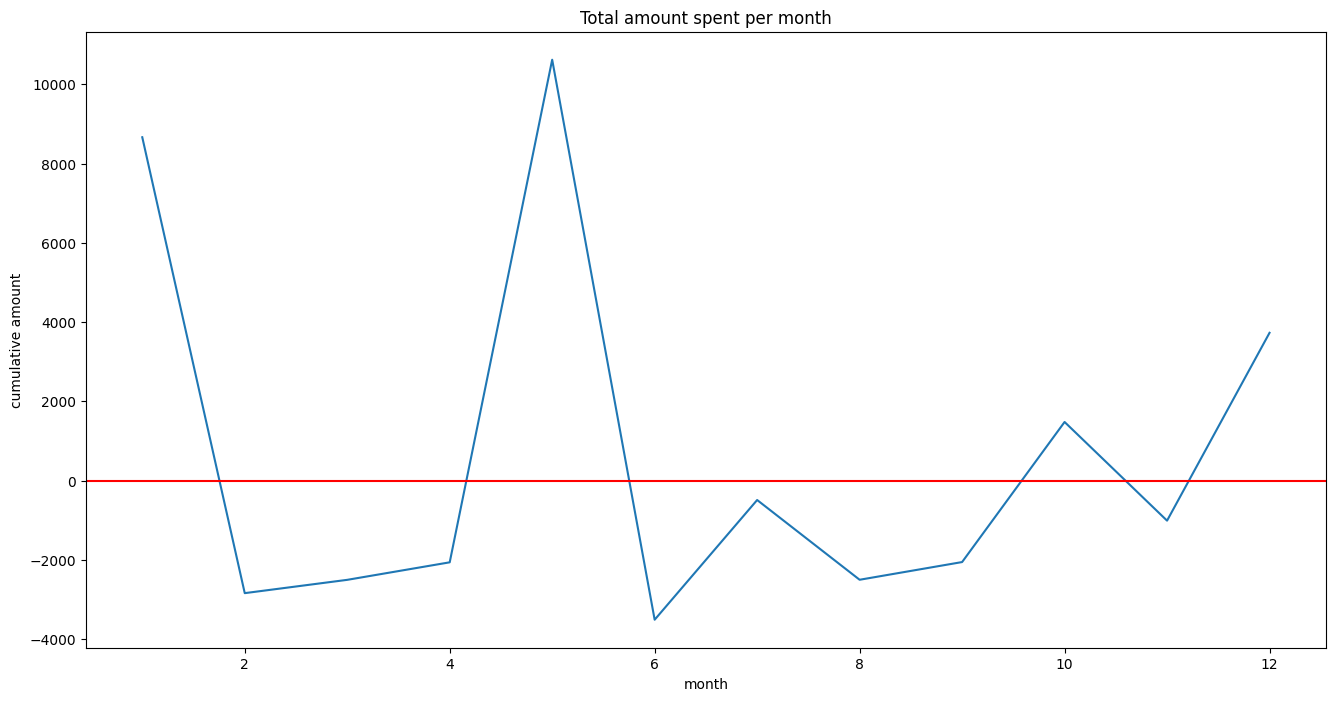

In [96]:
plt.figure(figsize=(16,8)) # plot the expenditures grouped by month
df_by_date=df.groupby('month',as_index=False).agg({'amount':'sum'}).sort_values('month')
plt.plot(df_by_date['month'], df_by_date['amount'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('month')
plt.ylabel('cumulative amount')
plt.title("Total amount spent per month")
plt.show()

In [99]:
#stats of financial amounts
amount_received=df_by_date.loc[df_by_date['amount']>0].amount.sum()
amount_spent=df_by_date.loc[df_by_date['amount']<0].amount.sum()
print("total amount spent: ", amount_spent)
print("total amount received: ", amount_received)
print("received - spent: ", amount_spent-amount_received)
df_by_date.head(12)

total amount spent:  -16973.66641160614
total amount received:  24498.700497288854
received - spent:  -41472.366908895


,month,amount
0,1,8666.000000
1,2,-2839.823395
2,3,-2504.153256
3,4,-2061.955108
4,5,10622.218429
5,6,-3510.556988
6,7,-489.333333
7,8,-2502.000000
8,9,-2055.447509
9,10,1479.815402


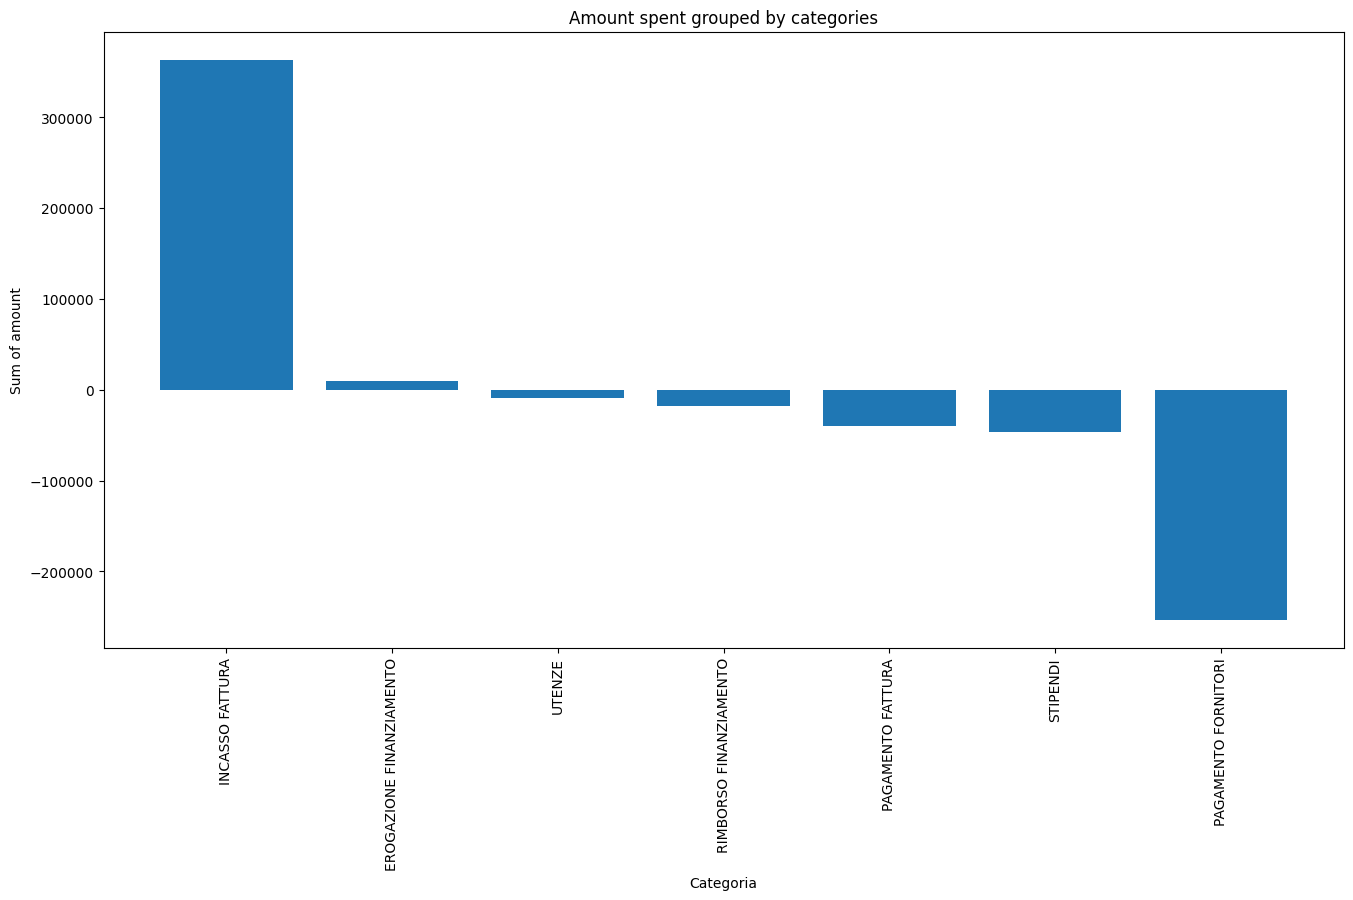

In [98]:
#group the amount spent by categories
grouped_df=df.groupby('categoria',as_index=False).agg({'amount':'sum'}).sort_values('amount',ascending=False)    
plt.figure(figsize=(16,8))
plt.bar(grouped_df['categoria'], grouped_df['amount'])
plt.xlabel('Categoria')
plt.ylabel('Sum of amount')
plt.xticks(rotation=90)
plt.title('Amount spent grouped by categories')
plt.show()

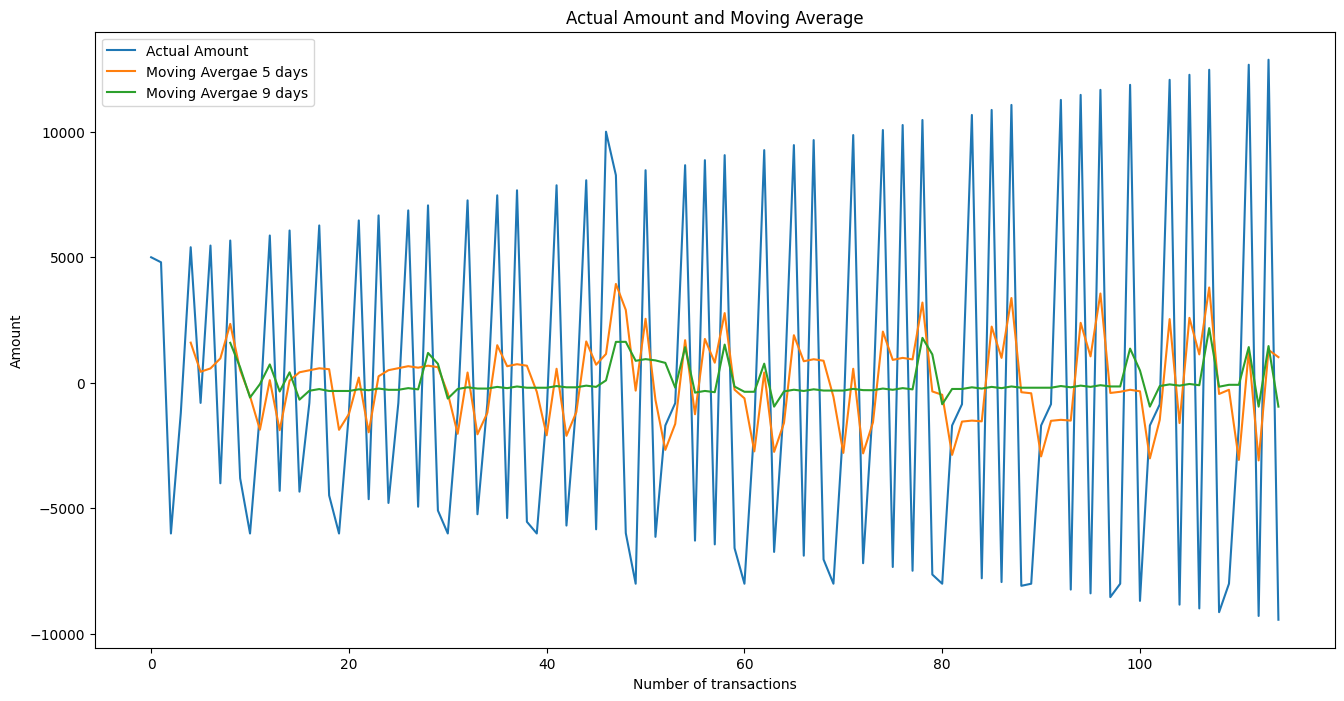

In [105]:
plt.figure(figsize=(16,8))
plt.plot(df['amount'],label= 'Actual Amount')
plt.plot(df['amount'].rolling(5).mean(),label= 'Moving Avergae 5 days')
plt.plot(df['amount'].rolling(9).mean(),label= 'Moving Avergae 9 days')
plt.xlabel("Number of transactions")
plt.ylabel("Amount")
plt.legend()
plt.title('Actual Amount and Moving Average')
plt.show()

In [106]:
# prophet for forecasting the company's financials for next 12 years (results won't be good due to limited data)

from sklearn.model_selection import train_test_split
df=df.sort_values(by='date')
df.rename(columns={'date': 'ds', 'amount': 'y'}, inplace=True)
train_data = df.sample(frac=0.8, random_state=10)
validation_data = df.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')

train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

training data size : (92, 8)
validation data size : (23, 8)


In [107]:
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
# fit the prophet model
model = Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
#compare with predictions on the validation data
prediction = model.predict(pd.DataFrame({'ds':validation_data['ds']}))
y_actual = validation_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted) # very high error because of limited data

6657.799147102286

In [109]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-04,960.775479,-10729.423254,7234.296866,960.775479,960.775479,-2485.713074,-2485.713074,-2485.713074,-2485.713074,-2485.713074,-2485.713074,0.0,0.0,0.0,-1524.937595
1,2022-02-09,794.382269,-6962.286193,11036.777636,794.382269,794.382269,839.306010,839.306010,839.306010,839.306010,839.306010,839.306010,0.0,0.0,0.0,1633.688279
2,2022-02-09,794.382269,-7428.292512,10630.769478,794.382269,794.382269,839.306010,839.306010,839.306010,839.306010,839.306010,839.306010,0.0,0.0,0.0,1633.688279
3,2022-02-15,766.650067,-10679.197751,6902.084708,766.650067,766.650067,-2485.713074,-2485.713074,-2485.713074,-2485.713074,-2485.713074,-2485.713074,0.0,0.0,0.0,-1719.063007
4,2022-02-27,711.185664,-6516.586390,10897.788288,711.185664,711.185664,1367.030525,1367.030525,1367.030525,1367.030525,1367.030525,1367.030525,0.0,0.0,0.0,2078.216189


          ds         yhat    yhat_lower    yhat_upper     yhat_avg
0 2022-01-04 -1524.937595 -10729.423254   7234.296866 -1747.563194
1 2022-02-09  1633.688279  -6962.286193  11036.777636  2037.245722
2 2022-02-09  1633.688279  -7428.292512  10630.769478  1601.238483
3 2022-02-15 -1719.063007 -10679.197751   6902.084708 -1888.556522
4 2022-02-27  2078.216189  -6516.586390  10897.788288  2190.600949


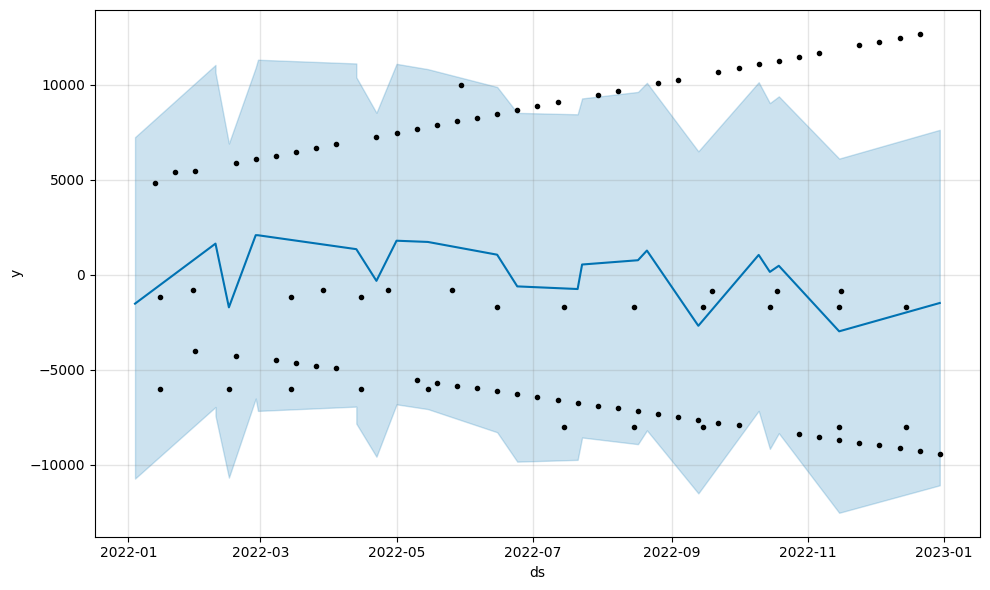

In [113]:
# plotting the predictions by prophet
prediction['yhat_avg']=prediction[['yhat_lower','yhat_upper']].mean(axis=1)
print(prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper','yhat_avg']].head())
model.plot(prediction)
plt.show()

#### by looking at the results of prophet the lending manager can see if it is worth giving the loan or not i.e. whether the company will be able to payback

### the company has spent more than what it has received in 1 year but the financial statement is strong i.e. near 24M so, it's loan can be approved